In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv
/kaggle/input/scores/Score_Sys_1.txt
/kaggle/input/scores/Score_Sys_2.txt
/kaggle/input/mushroom-classification/mushrooms.csv


# **1. un jeux de donnees qualitatif**

Voici le lien du dataset "Mushroom Classification" de Kaggle 

https://www.kaggle.com/datasets/uciml/mushroom-classification

**Présentation du dataset**

Ce dataset contient des caractéristiques de champignons et vise à prédire s'ils sont comestibles ou toxiques.
Il contient 23 colonnes : 22 pour les caractéristiques (comme la couleur du chapeau, l’odeur, la texture...) et 1 colonne cible qui indique si le champignon est comestible (e) ou toxique (p).
Toutes les variables sont catégoriques, ce qui est important pour l'entraînement du modèle.

**1. Les arbres de décision** 

**Chargement et exploration des données**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [117]:
# Charger le dataset 
df=pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [118]:
# Afficher les premières lignes pour comprendre la structure des données
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [119]:
print(df.info)

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [120]:
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [121]:
print(df.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [122]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())


Valeurs manquantes par colonne:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


**Prétraitement des variables catégorielles**

In [123]:
# Encodage des variables catégorielles en numériques
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convertir chaque colonne catégorielle en numérique
    label_encoders[col] = le  # Stocker le label encoder pour une éventuelle future conversion inverse

**Séparation des données en train/test**

In [124]:
# Séparation des features (X) et de la cible (y)
X = df.drop(columns=['class'])  # Toutes les colonnes sauf la colonne cible
y = df['class']  # La colonne cible indiquant si le champignon est comestible ou toxique

# Séparation des données en ensemble d'entraînement et de test (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Entraînement d’un modèle DecisionTreeClassifier**

**CART**

In [125]:
# Création et entraînement du modèle d'arbre de décision
model1 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

model1.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred1 = model1.predict(X_test)

**ID3**

In [126]:
# Création et entraînement du modèle d'arbre de décision en utilisant ID3
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model2.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred2 = model2.predict(X_test)

**Évaluation du modèle avec une matrice de confusion et un score d’accuracy**

**CART**

In [127]:
# Évaluation du premier modele
accuracy = accuracy_score(y_test, y_pred1)
print(f"\nAccuracy du premier modèle : {accuracy:.4f}")



Accuracy du premier modèle : 0.9791


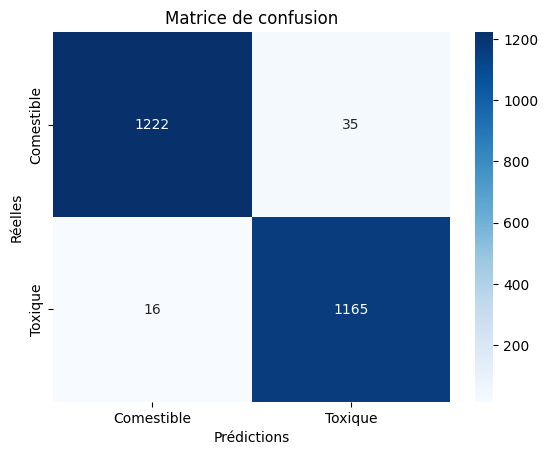

In [128]:
# Matrice de confusion du premier modele
conf_matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Comestible', 'Toxique'], yticklabels=['Comestible', 'Toxique'])
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title('Matrice de confusion')
plt.show()

In [129]:
# Rapport de classification du premier modele
print("\nRapport de classification:")
print(classification_report(y_test, y_pred1))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1257
           1       0.97      0.99      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



**ID3**

In [130]:
# Évaluation du deuxiemme modèle
accuracy = accuracy_score(y_test, y_pred2)
print(f"\nAccuracy du deuxiemme modèle : {accuracy:.4f}")


Accuracy du deuxiemme modèle : 0.9811


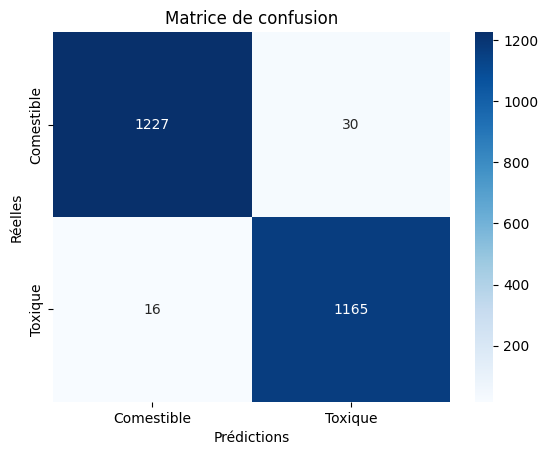

In [131]:
# Matrice de confusion du deuxiemme modele
conf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Comestible', 'Toxique'], yticklabels=['Comestible', 'Toxique'])
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title('Matrice de confusion')
plt.show()

In [132]:
# Rapport de classification du deuxiemme modele
print("\nRapport de classification:")
print(classification_report(y_test, y_pred2))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1257
           1       0.97      0.99      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



**Visualisation de l’arbre de décision**

**CART**

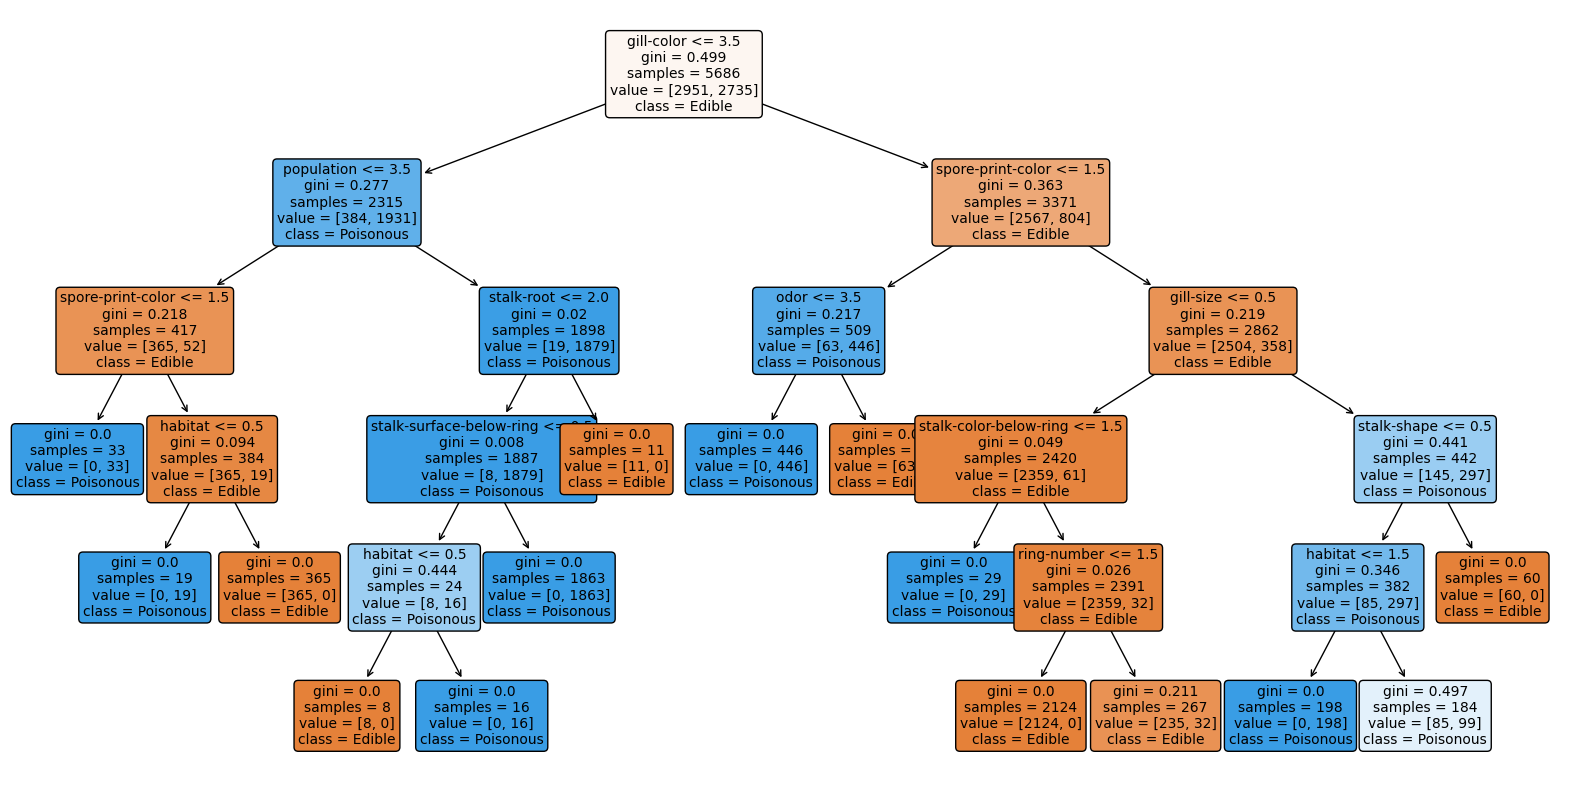

In [133]:
# Visualisation de l'arbre de décision du premier modele
plt.figure(figsize=(20,10))
plot_tree(model1, feature_names=X.columns, class_names=['Edible', 'Poisonous'], filled=True, rounded=True, fontsize=10)
plt.show()

**ID3**

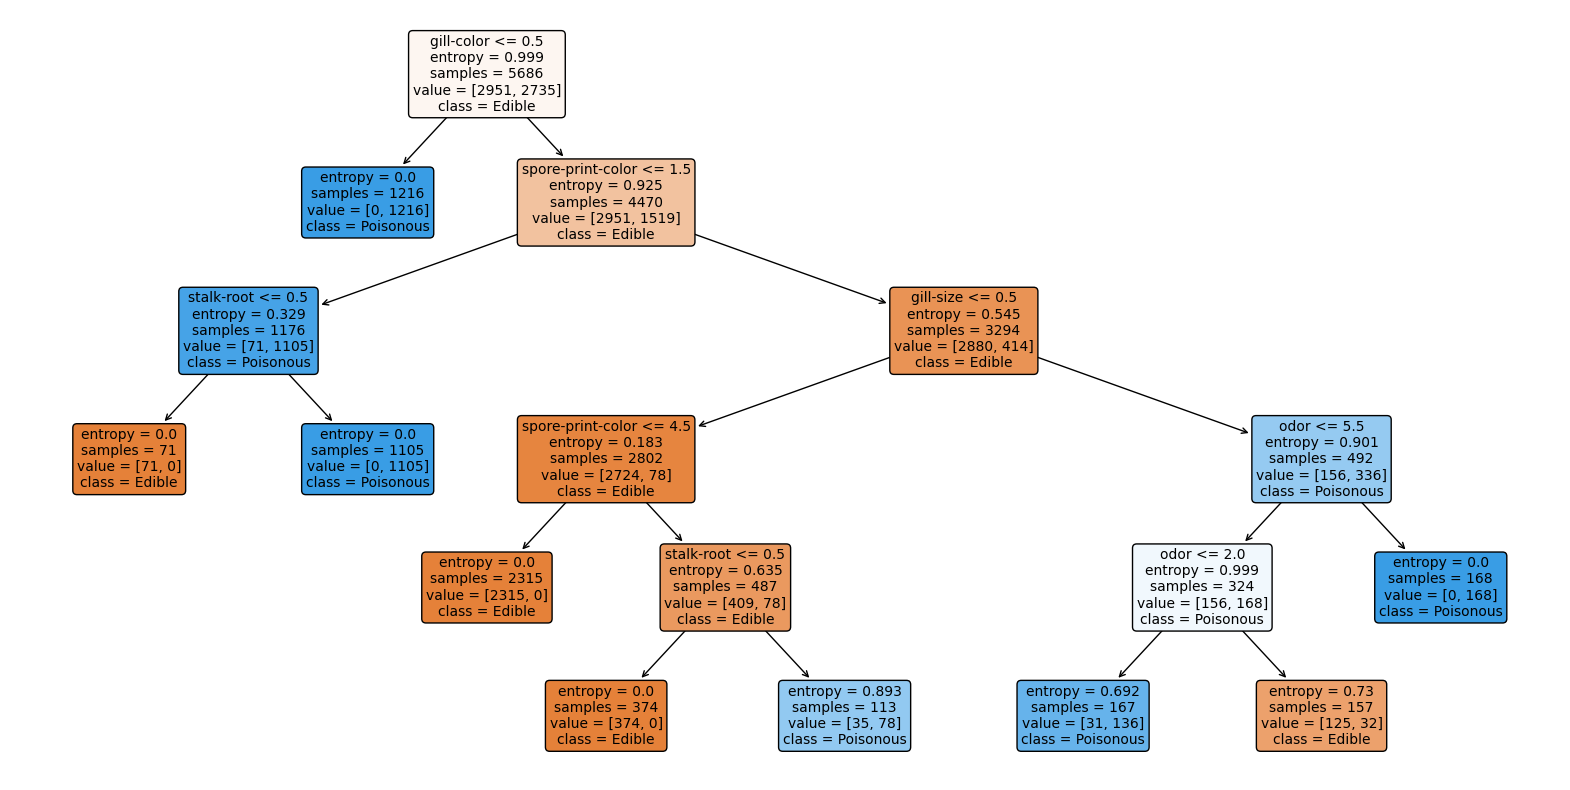

In [134]:
# Visualisation de l'arbre de décision du deuxiemme modele
plt.figure(figsize=(20,10))
plot_tree(model2, feature_names=X.columns, class_names=['Edible', 'Poisonous'], filled=True, rounded=True, fontsize=10)
plt.show()

**2. Les forêts aléatoires**

**CART**

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Création et entraînement du modèle de forêts aléatoires avec le critère 'entropy'
model3 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
model3.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred3 = model3.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred3)
print(f"\nAccuracy du modèle : {accuracy:.4f}")

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred3))

train_accuracy = accuracy_score(y_train, model3.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy entraînement : {train_accuracy:.4f}")
print(f"Accuracy test : {test_accuracy:.4f}")


Accuracy du modèle : 1.0000

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy entraînement : 1.0000
Accuracy test : 1.0000


Le modèle sur-apprend (overfitting), car il obtient 100% de précision sur les données d'entraînement. Cela signifie qu'il a mémorisé les données au lieu de généraliser.

Solution:
La validation croisée (cross-validation) permet de tester le modèle sur différents sous-ensembles des données pour s'assurer qu'il se généralise bien. Cela peut aider à éviter un surapprentissage lié à la sélection aléatoire d'un ensemble d'entraînement.

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Création du modèle de forêts aléatoires
model3 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Validation croisée (en supposant que X et y sont bien définis)
cv_scores = cross_val_score(model3, X, y, cv=3)

# Affichage des résultats
print(f"\nScores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean():.4f}")




Scores de validation croisée : [0.90546529 0.99113737 0.71935007]
Moyenne des scores de validation croisée : 0.8720


**ID3**

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Création du modèle de forêts aléatoires
model4 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Validation croisée (en supposant que X et y sont bien définis)
cv_scores = cross_val_score(model4, X, y, cv=3)

# Affichage des résultats
print(f"\nScores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean():.4f}")



Scores de validation croisée : [0.90546529 0.99187592 0.73412112]
Moyenne des scores de validation croisée : 0.8772


# **2. un jeux de donnees quantitatif**

Voici le lien du dataset "Mushroom Classification" de Kaggle

https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset

**Présentation du dataset**

Le Obesity Prediction Dataset disponible sur Kaggle est conçu pour estimer les niveaux d'obésité en fonction des habitudes alimentaires, des antécédents familiaux et de la condition physique des individus. Ce jeu de données comprend des informations provenant de personnes originaires du Mexique, du Pérou et de la Colombie.

Description du jeu de données : Le jeu de données contient 17 attributs et 2111 enregistrements. Les enregistrements sont étiquetés avec la variable de classe "NObesity" (niveau d'obésité), qui permet de classer les données selon les valeurs suivantes :

Insufficient Weight
Normal Weight
Overweight Level I
Overweight Level II
Obesity Type I
Obesity Type II
Obesity Type III

Les attributs incluent des informations sur les habitudes alimentaires, l'activité physique, les antécédents familiaux et d'autres facteurs liés à la santé.

**1. Les arbres de décision**

**Chargement et exploration des données**

In [138]:
# Charger le dataset 
df2=pd.read_csv('/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv')


In [139]:
# Afficher les premières lignes pour comprendre la structure des données
print(df2.head())

   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Wei

In [140]:
print(df2.info)

<bound method DataFrame.info of       Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no   2.0   
1     Female   21    1.52   56.00                            yes   no   3.0   
2       Male   23    1.80   77.00                            yes   no   2.0   
3       Male   27    1.80   87.00                             no   no   3.0   
4       Male   22    1.78   89.80                             no   no   2.0   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes   3.0   
2107  Female   22    1.75  133.74                            yes  yes   3.0   
2108  Female   23    1.75  133.69                            yes  yes   3.0   
2109  Female   24    1.74  133.35                            yes  yes   3.0   
2110  Female   24    1.74  133.47                            yes  yes   3.0   

      NCP       CAE

In [141]:
print(df2.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [142]:
print(df2.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.315964     1.701620    86.586035     2.418986     2.685651   
std       6.357078     0.093368    26.191163     0.533996     0.778079   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      20.000000     1.630000    65.470000     2.000000     2.660000   
50%      23.000000     1.700000    83.000000     2.390000     3.000000   
75%      26.000000     1.770000   107.430000     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008053     1.010313     0.657861  
std       0.612950     0.850613     0.608926  
min       1.000000     0.000000     0.000000  
25%       1.585000     0.125000     0.000000  
50%       2.000000     1.000000     0.625000  
75% 

In [143]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df2.isnull().sum())


Valeurs manquantes par colonne:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


**Prétraitement des variables catégorielles**

In [144]:
print(df2.dtypes)

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [145]:
from sklearn.preprocessing import OneHotEncoder

# Sélection des colonnes catégorielles
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Appliquer One-Hot Encoding
data = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

print(data.head())


   Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE           NObeyesdad  \
0   21    1.62    64.0   2.0  3.0   2.0  0.0  1.0        Normal_Weight   
1   21    1.52    56.0   3.0  3.0   3.0  3.0  0.0        Normal_Weight   
2   23    1.80    77.0   2.0  3.0   2.0  2.0  1.0        Normal_Weight   
3   27    1.80    87.0   3.0  3.0   2.0  2.0  0.0   Overweight_Level_I   
4   22    1.78    89.8   2.0  1.0   2.0  0.0  0.0  Overweight_Level_II   

   Gender_Male  ...  CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  \
0        False  ...    False      False    False            False   
1        False  ...    False       True     True            False   
2         True  ...    False      False    False             True   
3         True  ...    False      False    False             True   
4         True  ...    False      False    False            False   

   CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0           False     True        False             False   
1            True 

Certaines variables peuvent avoir des échelles différentes, donc on normalise :

In [146]:
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes numériques
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Appliquer la normalisation
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data.head())


        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.521741 -0.874380 -0.862558 -0.784810  0.404102 -0.013141 -1.188028   
1 -0.521741 -1.945660 -1.168077  1.088307  0.404102  1.618701  2.339676   
2 -0.207057  1.053924 -0.366089 -0.784810  0.404102 -0.013141  1.163774   
3  0.422312  1.053924  0.015809  1.088307  0.404102 -0.013141  1.163774   
4 -0.364399  0.839668  0.122741 -0.784810 -2.166941 -0.013141 -1.188028   

        TUE           NObeyesdad  Gender_Male  ...  CAEC_no  SMOKE_yes  \
0  0.562005        Normal_Weight        False  ...    False      False   
1 -1.080619        Normal_Weight        False  ...    False       True   
2  0.562005        Normal_Weight         True  ...    False      False   
3 -1.080619   Overweight_Level_I         True  ...    False      False   
4 -1.080619  Overweight_Level_II         True  ...    False      False   

   SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0    False            False        

**Séparation des données en train/test**

In [147]:
# Séparation des attributs et de la variable cible
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Entraînement d’un modèle DecisionTreeClassifier**

**CART**

In [148]:
# Initialisation et entraînement de l'arbre de décision
clf = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Prédictions
y_pred1 = clf.predict(X_test)

**ID3**

In [149]:
# Initialisation et entraînement de l'arbre de décision
clf2 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)
clf2.fit(X_train, y_train)

# Prédictions
y_pred2 = clf2.predict(X_test)

**Évaluation du modèle avec une matrice de confusion et un score d’accuracy**

**CART**

In [150]:
# Évaluation du premier modele
accuracy = accuracy_score(y_test, y_pred1)
print(f"\nAccuracy du premier modèle : {accuracy:.4f}")



Accuracy du premier modèle : 0.8218


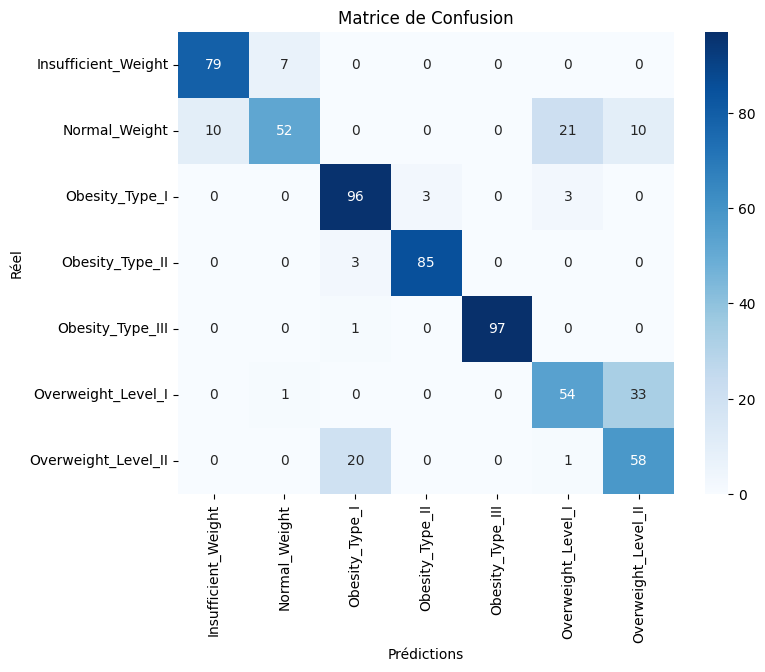

In [151]:
# Créer la matrice de confusion
cm = confusion_matrix(y_test, y_pred1)

# Affichage avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()


In [152]:
# Rapport de classification du premier modele
print("\nRapport de classification:")
print(classification_report(y_test, y_pred1))


Rapport de classification:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.92      0.90        86
      Normal_Weight       0.87      0.56      0.68        93
     Obesity_Type_I       0.80      0.94      0.86       102
    Obesity_Type_II       0.97      0.97      0.97        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.68      0.61      0.65        88
Overweight_Level_II       0.57      0.73      0.64        79

           accuracy                           0.82       634
          macro avg       0.83      0.82      0.81       634
       weighted avg       0.83      0.82      0.82       634



**ID3**

In [153]:
# Évaluation du premier modele
accuracy = accuracy_score(y_test, y_pred2)
print(f"\nAccuracy du premier modèle : {accuracy:.4f}")



Accuracy du premier modèle : 0.7981


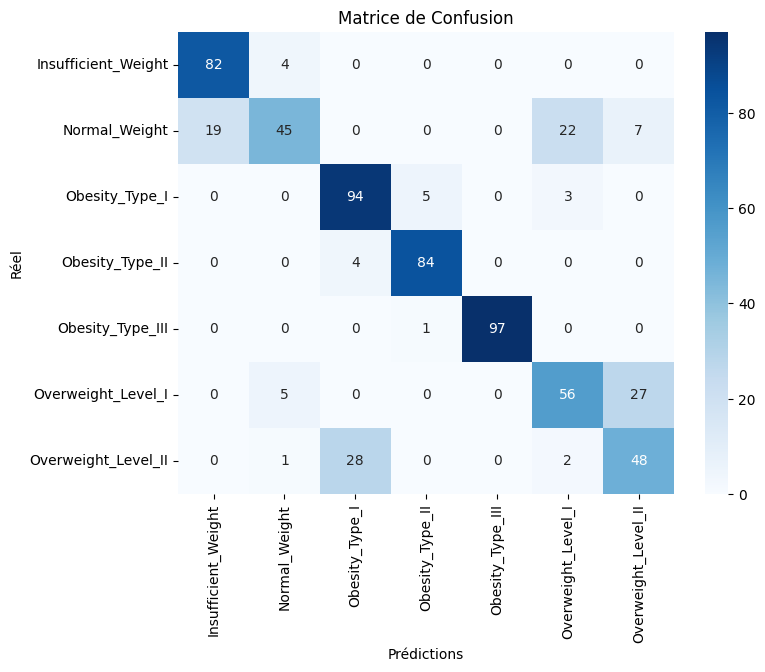

In [154]:
# Créer la matrice de confusion
cm = confusion_matrix(y_test, y_pred2)

# Affichage avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()


In [155]:
# Rapport de classification du premier modele
print("\nRapport de classification:")
print(classification_report(y_test, y_pred2))


Rapport de classification:
                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.95      0.88        86
      Normal_Weight       0.82      0.48      0.61        93
     Obesity_Type_I       0.75      0.92      0.82       102
    Obesity_Type_II       0.93      0.95      0.94        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.67      0.64      0.65        88
Overweight_Level_II       0.59      0.61      0.60        79

           accuracy                           0.80       634
          macro avg       0.80      0.79      0.79       634
       weighted avg       0.80      0.80      0.79       634



**Visualisation de l’arbre de décision**

**CART**

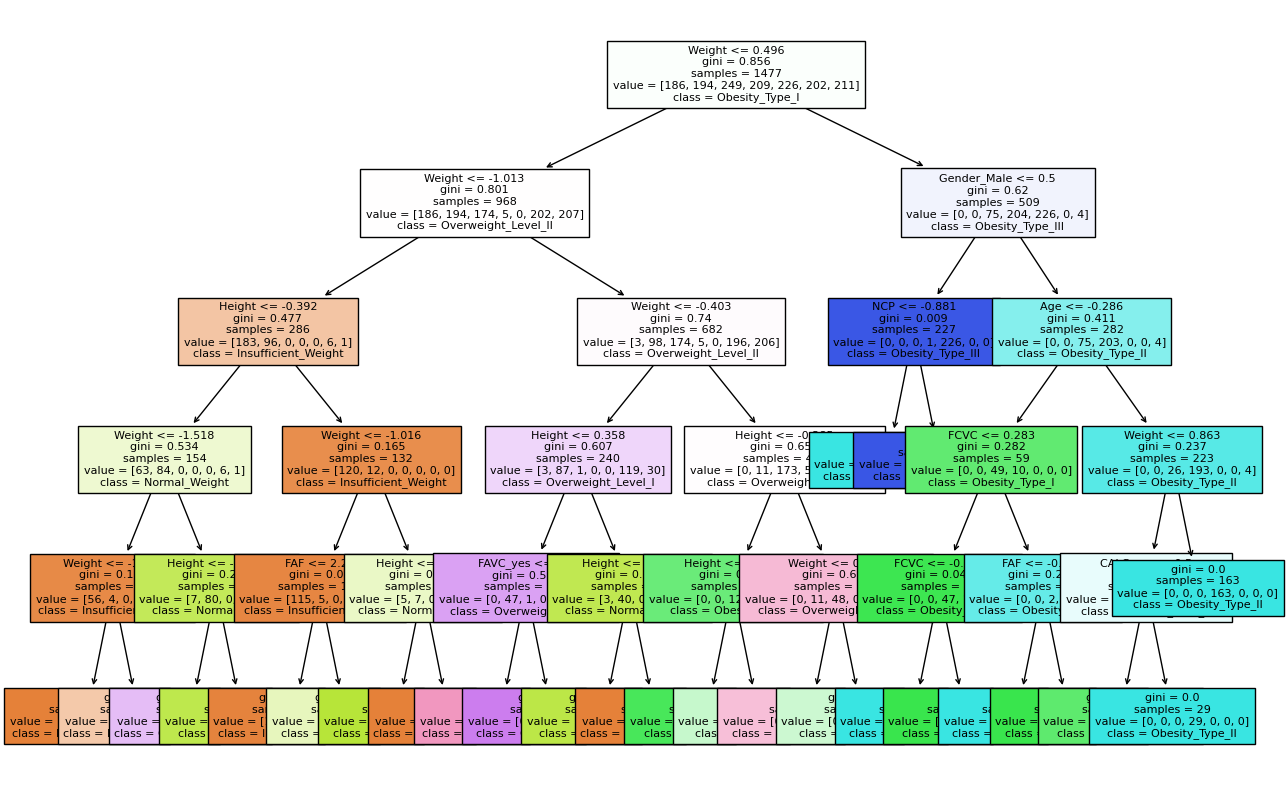

In [156]:
# Affichage de l'arbre de décision
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=8)
plt.show()

**ID3**

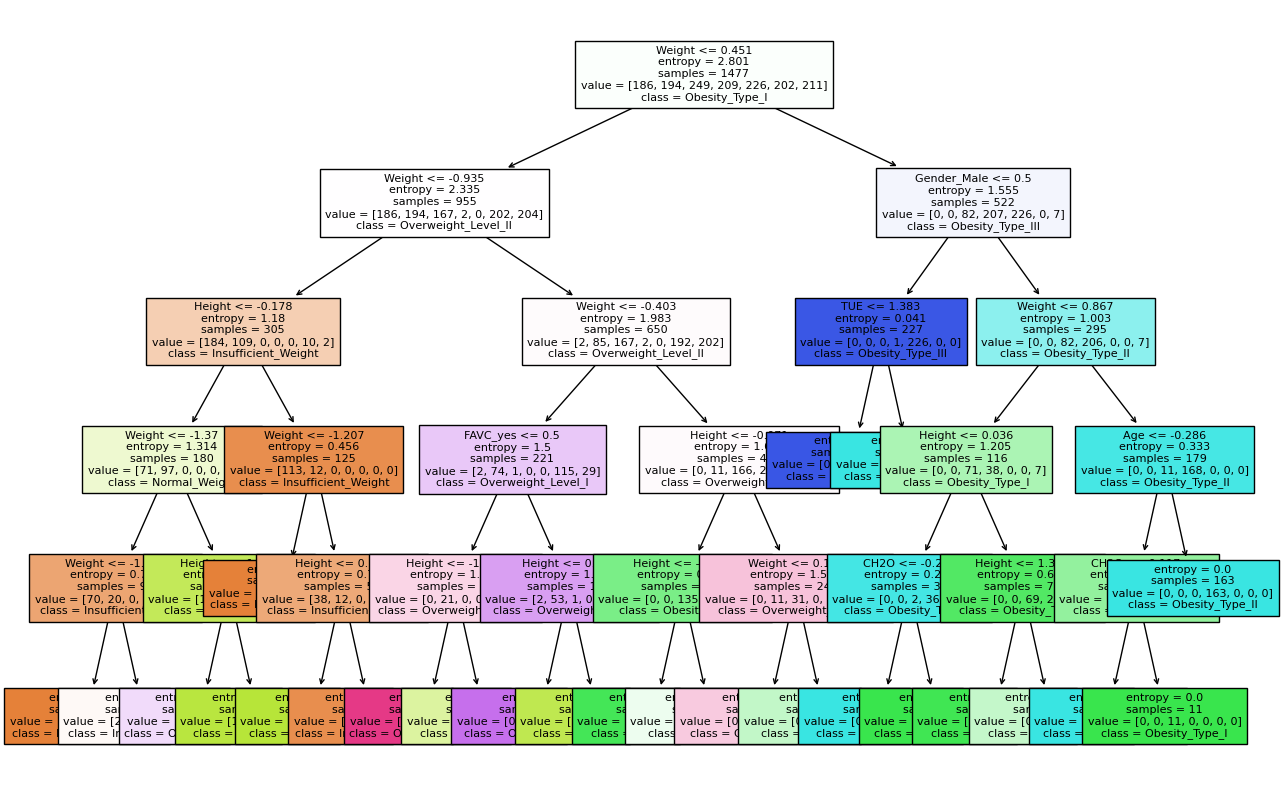

In [157]:
# Affichage de l'arbre de décision
plt.figure(figsize=(15, 10))
plot_tree(clf2, feature_names=X.columns, class_names=clf2.classes_, filled=True, fontsize=8)
plt.show()

**2. Les forêts aléatoires**

**CART**

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Création du modèle de forêts aléatoires
clf3 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Validation croisée (en supposant que X et y sont bien définis)
cv_scores = cross_val_score(clf3, X, y, cv=3)

# Affichage des résultats
print(f"\nScores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean():.4f}")



Scores de validation croisée : [0.80539773 0.97585227 0.98150782]
Moyenne des scores de validation croisée : 0.9209


**ID3**

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Création du modèle de forêts aléatoires
clf4 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Validation croisée (en supposant que X et y sont bien définis)
cv_scores = cross_val_score(clf4, X, y, cv=3)

# Affichage des résultats
print(f"\nScores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean():.4f}")



Scores de validation croisée : [0.82954545 0.98011364 0.98008535]
Moyenne des scores de validation croisée : 0.9299


# 3.	Le jeu de données reçu par e-mail : 

**Arbre de decisions**

**CART**

In [160]:
# Chargement des fichiers
df3 = pd.read_csv('/kaggle/input/scores/Score_Sys_1.txt', sep="\s+", header=None, names=["Class", "Score"])
df4 = pd.read_csv('/kaggle/input/scores/Score_Sys_2.txt', sep="\s+", header=None, names=["Class", "Score"])

# Fusion des datasets
dfglob = pd.concat([df3, df4], ignore_index=True)

In [161]:
print(dfglob.head())

   Class  Score
0      1  1.355
1      1  2.403
2      1  1.443
3      1  3.125
4      1  1.640


In [162]:
# Séparation des features et labels
X = dfglob[["Score"]]
y = dfglob["Class"]

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [163]:
# Entraînement du modèle
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

In [164]:
# Évaluation du modèle
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Matrice de confusion:\n", conf_matrix)
print("Accuracy:", accuracy)


Matrice de confusion:
 [[4447  272]
 [ 291 2233]]
Accuracy: 0.9222697777164158


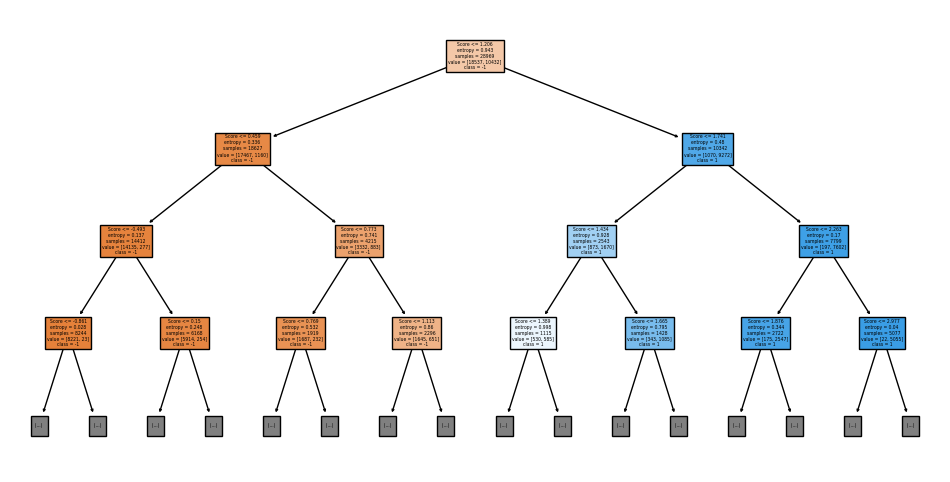

In [165]:
# Visualisation de l'arbre de décision
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=["Score"], class_names=["-1", "1"], filled=True, max_depth=3)
plt.show()

forest aleatoires

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Création du modèle de forêts aléatoires
model = RandomForestClassifier(n_estimators=30, criterion='gini', random_state=42)

# Validation croisée 
cv_scores = cross_val_score(model, X, y, cv=3)

# Affichage des résultats
print(f"\nScores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean():.4f}")




Scores de validation croisée : [0.90928672 0.90754701 0.91077051]
Moyenne des scores de validation croisée : 0.9092
